## Quick Colorgram notebook

This notebook will quickly generate a colorgram for a searched word.

In [1]:
import compsyn
import os

In [2]:
from compsyn.helperfunctions import settings, search_and_download, run_google_vision, write_img_classifications_to_file

In [3]:
from compsyn.wordnet_functions import get_wordnet_tree_data

In [4]:
GOOGLE_APPLICATION_CREDENTIALS = "compsyn3-8cf6580619a9.json"

In [5]:
DRIVER_PATH = "/Users/bhargavvader/open_source/comp-syn/chromedriver"

In [6]:
settings(GOOGLE_APPLICATION_CREDENTIALS, DRIVER_PATH)

In [7]:
number_images = 100 
home = os.getcwd()

In [8]:
search_terms = ['explore']

In [ ]:
img_urls_dict = {}
for search_term in search_terms:
    print(search_term)
    urls = search_and_download(search_term = search_term, driver_path = DRIVER_PATH, home = home, number_images = number_images)
    img_urls_dict[search_term] = urls

In [9]:
imagedata = compsyn.datahelper.ImageData()

In [10]:
imagedata.load_image_dict_from_folder("downloads/explore")

In [11]:
imageanalysis = compsyn.analysis.ImageAnalysis(imagedata)

In [12]:
imageanalysis.compute_color_distributions(imageanalysis.labels_list, color_rep=['jzazbz', 'rgb'])

In [13]:
compressed_image_dict = imageanalysis.get_composite_image()

explore is being compressed.


In [14]:
imageanalysis.save_colorgram_to_disk() 

In [15]:
import PIL
import numpy as np

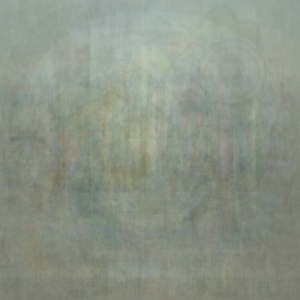

In [16]:
PIL.Image.fromarray(compressed_image_dict['explore'].astype(np.uint8))

### Colorgram options

The composite image function allows various parameters, to choose the first N images, to randomly sample from the 

In [17]:
compressed_image_50 = imageanalysis.get_composite_image(num_of_images=50)

explore is being compressed.


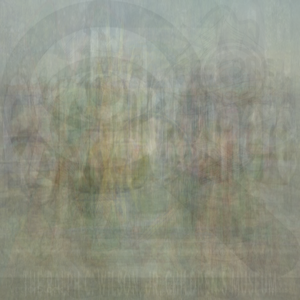

In [18]:
PIL.Image.fromarray(compressed_image_50['explore'].astype(np.uint8))

In [19]:
compressed_image_50_rev = imageanalysis.get_composite_image(num_of_images=50, reverse=True)

explore is being compressed.


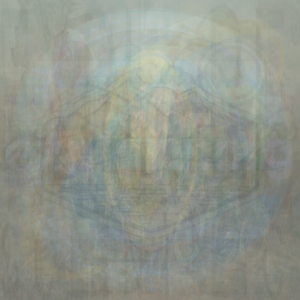

In [20]:
PIL.Image.fromarray(compressed_image_50_rev['explore'].astype(np.uint8))

In [21]:
compressed_image_sample = imageanalysis.get_composite_image(num_of_images=50, sample=True)

explore is being compressed.


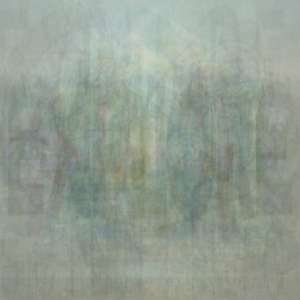

In [22]:
PIL.Image.fromarray(compressed_image_sample['explore'].astype(np.uint8))